In [1]:
# Initial imports
import pandas as pd
from path import Path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# We will start importing the 25M MovieLens Dataset which has been downloaded from https:/grouplens.org/movielens
# The first file is the list of movies
file_path = Path('movies.csv')
movies_df = pd.read_csv(file_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# We see that there are ~62k movies in this dataframe.  
movies_df.movieId.count()

62423

In [4]:
# Now lets import the movie ratings file
file_path2 = Path('ratings.csv')
ratings_df = pd.read_csv(file_path2)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
# Let's see if how many movies are left if we only recommend movies with an average rating greater 4.5 or 5.
# Note the ratings are in increments of .5
goodratings_df=ratings_df.groupby('movieId').mean('rating').reset_index()
goodratings_df.head()

,movieId,userId,rating,timestamp
0,1,81294.564728,3.893708,1.153152e+09
1,2,81358.542554,3.251527,1.122310e+09
2,3,81343.694934,3.142028,9.806023e+08
3,4,81266.193024,2.853547,9.424605e+08
4,5,81002.872460,3.058434,1.004723e+09


In [6]:
# Now we see we are we left ~59k movies
goodratings_df.shape

(59047, 4)

In [7]:
# Let's put make a list of movieIds that are in this good average rating catagory.
goodmovies=goodratings_df.movieId.unique()

In [8]:
goodmovies

array([     1,      2,      3, ..., 209163, 209169, 209171], dtype=int64)

In [9]:
# Let's now create a shorter movie dataframe with only the good movies remaining
movies_dfshort=movies_df.loc[movies_df['movieId'].isin(goodmovies)]
movies_dfshort.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# Now let's import the genome-score file which has  ~1k tags with each movie's relevanance score to that tag
file_path5 = Path('genome-scores.csv')
genomescores_df = pd.read_csv(file_path5)
genomescores_df.head(5)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
# This dataframe is rather large since it has tagIds and the relevant match each original 62k movies in the dataset
genomescores_df.shape

(15584448, 3)

In [12]:
# But we can reduce this dataset some to only include our "good movies"
genomescores_dfshort=genomescores_df.loc[genomescores_df['movieId'].isin(goodmovies)]
genomescores_dfshort.shape

(15584448, 3)

In [13]:
# By importing the genome-tags file we can see what text is represented by the tagId
file_path4 = Path('genome-tags.csv')
genometags_df = pd.read_csv(file_path4)
genometags_df.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [14]:
# Now lets combine the shorter list of good movies with their genome scoring as a dataframe
df=pd.merge(movies_dfshort,genomescores_dfshort,on='movieId', how='left')
df.head()

,movieId,title,genres,tagId,relevance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,0.02875
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,0.02375
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,0.06250
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,0.07575
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,0.14075


In [15]:
# check the size of our new dataframe
df.shape

(15629679, 5)

In [16]:
# Lets see how well this genome scoring seems to find relevant movies by examining tagId 310 which represent 
# texts 'disney animated feature'
check1_df=df.loc[(df['tagId']==310) & (df['relevance']>.95)]
check1_df.head(20)

,movieId,title,genres,tagId,relevance
53325,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,310.0,0.99650
256374,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance,310.0,0.97025
393991,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,310.0,0.99325
629755,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,310.0,0.99675
635396,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical,310.0,0.99700
636524,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,310.0,0.99375
637652,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,310.0,0.99450
657958,616,"Aristocats, The (1970)",Animation|Children,310.0,0.99725
734680,709,Oliver & Company (1988),Adventure|Animation|Children|Comedy|Musical,310.0,0.99425
801246,783,"Hunchback of Notre Dame, The (1996)",Animation|Children|Drama|Musical|Romance,310.0,0.99050


In [17]:
# Lets see how well this genome scoring seems to find relevant movies by examining tagId 1 which represent texts '007'
check1_df=df.loc[(df['tagId']==1) & (df['relevance']>.95)]
check1_df.head(20)

,movieId,title,genres,tagId,relevance
10152,10,GoldenEye (1995),Action|Adventure|Thriller,1.0,0.99950
1725966,1722,Tomorrow Never Dies (1997),Action|Adventure|Thriller,1.0,0.99975
2385890,2376,"View to a Kill, A (1985)",Action|Adventure|Thriller,1.0,0.99975
2991659,2947,Goldfinger (1964),Action|Adventure|Thriller,1.0,0.99950
2992787,2948,From Russia with Love (1963),Action|Adventure|Thriller,1.0,0.99975
2993915,2949,Dr. No (1962),Action|Adventure|Thriller,1.0,0.99975
3026632,2983,"Ipcress File, The (1965)",Thriller,1.0,0.97025
3033400,2989,For Your Eyes Only (1981),Action|Adventure|Thriller,1.0,0.99975
3034528,2990,Licence to Kill (1989),Action|Adventure|Thriller,1.0,0.99950
3035656,2991,Live and Let Die (1973),Action|Adventure|Thriller,1.0,0.99975


In [18]:
# Lets see how well this genome scoring seems to find relevant movies by examining tagId 43 which represent texts 'aliens'
check2_df=df.loc[(df['tagId']==43) & (df['relevance']>.95)]
check2_df.head(20)

,movieId,title,genres,tagId,relevance
209858,196,Species (1995),Horror|Sci-Fi,43.0,0.99950
340708,316,Stargate (1994),Action|Adventure|Sci-Fi,43.0,0.96025
456898,426,Body Snatchers (1993),Horror|Sci-Fi|Thriller,43.0,0.96475
467050,435,Coneheads (1993),Comedy|Sci-Fi,43.0,0.99225
553906,512,"Puppet Masters, The (1994)",Horror|Sci-Fi,43.0,0.99850
770515,748,"Arrival, The (1996)",Action|Sci-Fi|Thriller,43.0,0.99800
797595,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,43.0,0.99825
1121350,1097,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi,43.0,0.99450
1147300,1127,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller,43.0,0.99650
1214991,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,43.0,0.99950


In [19]:
# Let's merge in our actual genome tags for ease of interpretation
dfplots=pd.merge(df,genometags_df,on='tagId', how='left')
dfplots.head()

,movieId,title,genres,tagId,relevance,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,0.02875,007
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,0.02375,007 (series)
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,0.06250,18th century
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,0.07575,1920s
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,0.14075,1930s


In [20]:
goldeneye_df=dfplots.loc[df['movieId']==10]
goldeneye_df.rename(columns={'relevance':'goldeneye_rel'},inplace=True)
goldeneye_df.drop(columns=['movieId','title','genres'],inplace=True)
goldeneye_df.head()

,tagId,goldeneye_rel,tag
10152,1.0,0.99950,007
10153,2.0,1.00000,007 (series)
10154,3.0,0.02700,18th century
10155,4.0,0.06050,1920s
10156,5.0,0.07875,1930s


In [83]:
tomorneverdies_df=dfplots.loc[df['movieId']==1722]
tomorneverdies_df.rename(columns={'relevance':'tomorneverdies_rel'},inplace=True)
tomorneverdies_df.drop(columns=['movieId','title','genres'],inplace=True)
tomorneverdies_df.head()

,tagId,tomorneverdies_rel,tag
1725966,1.0,0.99975,007
1725967,2.0,1.00000,007 (series)
1725968,3.0,0.04025,18th century
1725969,4.0,0.05700,1920s
1725970,5.0,0.08025,1930s


In [84]:
correl_df=pd.merge(tomorneverdies_df,goldeneye_df,on='tagId')
correl_df.head()

,tagId,tomorneverdies_rel,tag_x,goldeneye_rel,tag_y
0,1.0,0.99975,007,0.99950,007
1,2.0,1.00000,007 (series),1.00000,007 (series)
2,3.0,0.04025,18th century,0.02700,18th century
3,4.0,0.05700,1920s,0.06050,1920s
4,5.0,0.08025,1930s,0.07875,1930s


Text(0.5, 1.0, 'Relevance For All Genome Tags')

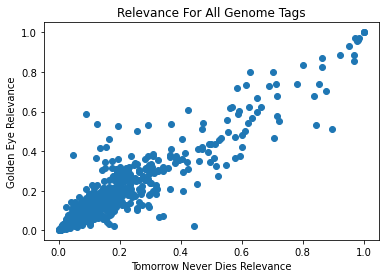

In [85]:
# now lets look at correlation of the tags for movies we know are similar 
# are Goldeneye and Tomorrow Never Dies
x_axis=correl_df.tomorneverdies_rel
y_axis=correl_df.goldeneye_rel
plt.scatter(x_axis,y_axis)
plt.xlabel('Tomorrow Never Dies Relevance')
plt.ylabel('Golden Eye Relevance')
plt.title('Relevance For All Genome Tags')

In [86]:
# Let's repeat for saving private ryan movie id 2028 and stalingrad movieid 760
privateryan_df=dfplots.loc[df['movieId']==2028]
privateryan_df.rename(columns={'relevance':'privateryan_rel'},inplace=True)
privateryan_df.drop(columns=['movieId','title','genres'],inplace=True)
privateryan_df.head()

,tagId,privateryan_rel,tag
2019269,1.0,0.02875,007
2019270,2.0,0.02550,007 (series)
2019271,3.0,0.04625,18th century
2019272,4.0,0.08200,1920s
2019273,5.0,0.29875,1930s


In [87]:
stalingrad_df=dfplots.loc[df['movieId']==760]
stalingrad_df.rename(columns={'relevance':'stalingrad_rel'},inplace=True)
stalingrad_df.drop(columns=['movieId','title','genres'],inplace=True)
stalingrad_df.head()

,tagId,stalingrad_rel,tag
780628,1.0,0.03175,007
780629,2.0,0.03425,007 (series)
780630,3.0,0.05700,18th century
780631,4.0,0.06375,1920s
780632,5.0,0.10875,1930s


In [88]:
correl_df2=pd.merge(stalingrad_df,privateryan_df,on='tagId')
correl_df2.head()

,tagId,stalingrad_rel,tag_x,privateryan_rel,tag_y
0,1.0,0.03175,007,0.02875,007
1,2.0,0.03425,007 (series),0.02550,007 (series)
2,3.0,0.05700,18th century,0.04625,18th century
3,4.0,0.06375,1920s,0.08200,1920s
4,5.0,0.10875,1930s,0.29875,1930s


Text(0.5, 1.0, 'Relevance For All Genome Tags')

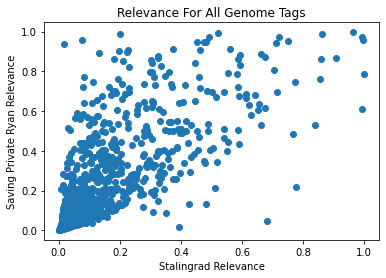

In [89]:
x_axis2=correl_df2.stalingrad_rel
y_axis2=correl_df2.privateryan_rel
plt.scatter(x_axis2,y_axis2)
plt.xlabel('Stalingrad Relevance')
plt.ylabel('Saving Private Ryan Relevance')
plt.title('Relevance For All Genome Tags')

In [90]:
# Let's repeat for saving Lion King movie id 364 and Aladdin movieid 588
lionking_df=dfplots.loc[df['movieId']==364]
lionking_df.rename(columns={'relevance':'lionking_rel'},inplace=True)
lionking_df.drop(columns=['movieId','title','genres'],inplace=True)
lionking_df.head()

,tagId,lionking_rel,tag
393682,1.0,0.02800,007
393683,2.0,0.02575,007 (series)
393684,3.0,0.11575,18th century
393685,4.0,0.06800,1920s
393686,5.0,0.13700,1930s


In [91]:
aladdin_df=dfplots.loc[df['movieId']==588]
aladdin_df.rename(columns={'relevance':'aladdin_rel'},inplace=True)
aladdin_df.drop(columns=['movieId','title','genres'],inplace=True)
aladdin_df.head()

,tagId,aladdin_rel,tag
629446,1.0,0.03050,007
629447,2.0,0.03075,007 (series)
629448,3.0,0.15150,18th century
629449,4.0,0.07050,1920s
629450,5.0,0.08075,1930s


In [92]:
correl_df3=pd.merge(lionking_df,aladdin_df,on='tagId')
correl_df3.head()

,tagId,lionking_rel,tag_x,aladdin_rel,tag_y
0,1.0,0.02800,007,0.03050,007
1,2.0,0.02575,007 (series),0.03075,007 (series)
2,3.0,0.11575,18th century,0.15150,18th century
3,4.0,0.06800,1920s,0.07050,1920s
4,5.0,0.13700,1930s,0.08075,1930s


Text(0.5, 1.0, 'Relevance For All Genome Tags')

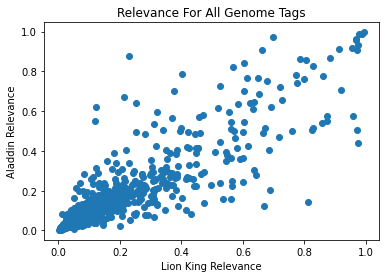

In [100]:
x_axis3=correl_df3.lionking_rel
y_axis3=correl_df3.aladdin_rel
plt.scatter(x_axis3,y_axis3)
plt.xlabel('Lion King Relevance')
plt.ylabel('Aladdin Relevance')
plt.title('Relevance For All Genome Tags')

In [94]:
# Let's repeat for I am Legend movie id 56174 and World War Z movieid 103249
iamlegend_df=dfplots.loc[df['movieId']==56174]
iamlegend_df.rename(columns={'relevance':'iamlegend_rel'},inplace=True)
iamlegend_df.drop(columns=['movieId','title','genres'],inplace=True)
iamlegend_df.head()

,tagId,iamlegend_rel,tag
10328529,1.0,0.04000,007
10328530,2.0,0.03350,007 (series)
10328531,3.0,0.02500,18th century
10328532,4.0,0.04175,1920s
10328533,5.0,0.05550,1930s


In [107]:
wwz_df=dfplots.loc[df['movieId']==103249]
wwz_df.rename(columns={'relevance':'wwz_rel'},inplace=True)
wwz_df.drop(columns=['movieId','title','genres'],inplace=True)
wwz_df.head()

,tagId,wwz_rel,tag
12894684,1.0,0.03100,007
12894685,2.0,0.02700,007 (series)
12894686,3.0,0.03025,18th century
12894687,4.0,0.04200,1920s
12894688,5.0,0.07025,1930s


In [108]:
correl_df4=pd.merge(iamlegend_df,wwz_df,on='tagId')
correl_df4.head()

,tagId,iamlegend_rel,tag_x,wwz_rel,tag_y
0,1.0,0.04000,007,0.03100,007
1,2.0,0.03350,007 (series),0.02700,007 (series)
2,3.0,0.02500,18th century,0.03025,18th century
3,4.0,0.04175,1920s,0.04200,1920s
4,5.0,0.05550,1930s,0.07025,1930s


Text(0.5, 1.0, 'Relevance For All Genome Tags')

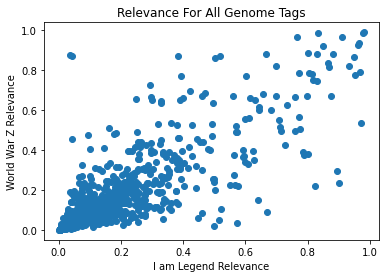

In [110]:
x_axis4=correl_df4.iamlegend_rel
y_axis4=correl_df4.wwz_rel
plt.scatter(x_axis4,y_axis4)
plt.xlabel('I am Legend Relevance')
plt.ylabel('World War Z Relevance')
plt.title('Relevance For All Genome Tags')

In [75]:
# Let's repeat for Batman Forever 153 and Batman 592
batmanforever_df=dfplots.loc[df['movieId']==153]
batmanforever_df.rename(columns={'relevance':'batmanforever_rel'},inplace=True)
batmanforever_df.drop(columns=['movieId','title','genres'],inplace=True)
batmanforever_df.head()

,tagId,batmanforever_rel,tag
161312,1.0,0.05675,007
161313,2.0,0.05000,007 (series)
161314,3.0,0.03700,18th century
161315,4.0,0.04850,1920s
161316,5.0,0.06550,1930s


In [76]:
batman_df=dfplots.loc[df['movieId']==592]
batman_df.rename(columns={'relevance':'batman_rel'},inplace=True)
batman_df.drop(columns=['movieId','title','genres'],inplace=True)
batman_df.head()

,tagId,batman_rel,tag
632831,1.0,0.04025,007
632832,2.0,0.03425,007 (series)
632833,3.0,0.05600,18th century
632834,4.0,0.10050,1920s
632835,5.0,0.20725,1930s


In [79]:
correl_df5=pd.merge(batmanforever_df,batman_df,on='tagId')
correl_df5.head()

,tagId,batmanforever_rel,tag_x,batman_rel,tag_y
0,1.0,0.05675,007,0.04025,007
1,2.0,0.05000,007 (series),0.03425,007 (series)
2,3.0,0.03700,18th century,0.05600,18th century
3,4.0,0.04850,1920s,0.10050,1920s
4,5.0,0.06550,1930s,0.20725,1930s


Text(0.5, 1.0, 'Relevance For All Genome Tags')

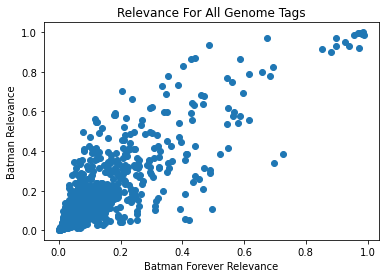

In [101]:
x_axis3=correl_df5.batmanforever_rel
y_axis3=correl_df5.batman_rel
plt.scatter(x_axis3,y_axis3)
plt.xlabel('Batman Forever Relevance')
plt.ylabel('Batman Relevance')
plt.title('Relevance For All Genome Tags')

In [32]:
# pivot the table to have movieIds as rows and genome tags as cols with relevance as values
X=df.pivot(index='movieId',columns='tagId',values='relevance')

In [33]:
X.drop(X.columns[0],axis=1,inplace=True)
X.head()

tagId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1119.0,1120.0,1121.0,1122.0,1123.0,1124.0,1125.0,1126.0,1127.0,1128.0
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [34]:
X.dropna(inplace=True)

In [35]:
X.describe

<bound method NDFrame.describe of tagId     1.0      2.0      3.0      4.0      5.0      6.0      7.0     \
movieId                                                                  
1        0.02875  0.02375  0.06250  0.07575  0.14075  0.14675  0.06350   
2        0.04125  0.04050  0.06275  0.08275  0.09100  0.06125  0.06925   
3        0.04675  0.05550  0.02925  0.08700  0.04750  0.04775  0.04600   
4        0.03425  0.03800  0.04050  0.03100  0.06500  0.03575  0.02900   
5        0.04300  0.05325  0.03800  0.04100  0.05400  0.06725  0.02775   
...          ...      ...      ...      ...      ...      ...      ...   
205072   0.02050  0.01775  0.11400  0.03650  0.31225  0.03675  0.10700   
205076   0.03825  0.03150  0.03200  0.05325  0.20850  0.07050  0.06625   
205383   0.04100  0.04025  0.02750  0.07850  0.19750  0.17825  0.17125   
205425   0.04525  0.04125  0.04250  0.07425  0.11550  0.10500  0.08275   
206499   0.10050  0.09325  0.02225  0.04550  0.21125  0.06125  0.10425   

tag

In [36]:
X_scaled=StandardScaler().fit_transform(X)

In [37]:
X.to_csv('xcheck.csv')

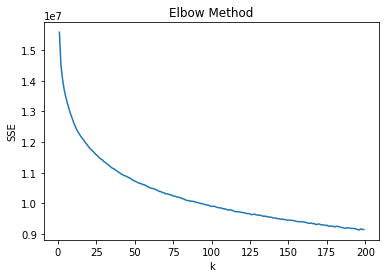

In [38]:
sse = {}
K = range(1,200)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [39]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=200, random_state=42).fit(X_scaled)

In [40]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [41]:
y_pred

array([146, 107,  50, ...,  20, 184,  18])

In [45]:
X.head()

tagId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1119.0,1120.0,1121.0,1122.0,1123.0,1124.0,1125.0,1126.0,1127.0,1128.0
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [46]:
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
df_y.head()

,Cluster
0,146
1,107
2,50
3,41
4,41


In [49]:
X.reset_index(inplace=True)
X.head()

tagId,movieId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,1119.0,1120.0,1121.0,1122.0,1123.0,1124.0,1125.0,1126.0,1127.0,1128.0
0,1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [50]:
# Add predicted values onto the original dataframe

combined = X.join(df_y, on='movieId',how='inner')
combined.head()

,movieId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,1120.0,1121.0,1122.0,1123.0,1124.0,1125.0,1126.0,1127.0,1128.0,Cluster
0,1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200,107
1,2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975,50
2,3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775,41
3,4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500,41
4,5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600,136


In [51]:
finalclustering_df=pd.merge(combined,movies_df,on='movieId',how='left')

In [52]:
finalclustering_df.head()

,movieId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,1122.0,1123.0,1124.0,1125.0,1126.0,1127.0,1128.0,Cluster,title,genres
0,1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200,107,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975,50,Jumanji (1995),Adventure|Children|Fantasy
2,3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775,41,Grumpier Old Men (1995),Comedy|Romance
3,4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500,41,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600,136,Father of the Bride Part II (1995),Comedy


In [57]:
finalclustering_df=finalclustering_df.filter(['movieId','Cluster','title','genres',])

In [59]:
finalclustering_df.head()

,movieId,Cluster,title,genres
0,1,107,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,50,Jumanji (1995),Adventure|Children|Fantasy
2,3,41,Grumpier Old Men (1995),Comedy|Romance
3,4,41,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,136,Father of the Bride Part II (1995),Comedy


In [61]:
finalclustering_df.loc[finalclustering_df['Cluster']==41]

,movieId,Cluster,title,genres
2,3,41,Grumpier Old Men (1995),Comedy|Romance
3,4,41,Waiting to Exhale (1995),Comedy|Drama|Romance
44,45,41,To Die For (1995),Comedy|Drama|Thriller
110,114,41,Margaret's Museum (1995),Drama
162,172,41,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller
...,...,...,...,...
6882,8516,41,"Matter of Life and Death, A (Stairway to Heave...",Drama|Fantasy|Romance
7046,8798,41,Collateral (2004),Action|Crime|Drama|Thriller
7114,8903,41,"Terror, The (1963)",Horror|Mystery
7183,8988,41,Cinderfella (1960),Comedy


In [63]:
finalclustering_df.to_csv('cluster.csv')